<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr2/blob/Kostin-Sergey-folder/Kostin%20Sergey/SUMUP_%7C_17_05_23_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO

Основываясь на полученных данных после созвона и предыдущих попытках отбора данных алгоритм таков:
1. Почистить данные общего вида ([DataGlobalClear.ipynb](https://colab.research.google.com/drive/1qKoFxu6-CF-X4Ier7bd1r_O4EZPTQhS1?usp=sharing))
2. Почистить данные м/ж вида ([DataSexClear.ipynb](https://colab.research.google.com/drive/1lGpWVOsJv8JC9hlj_T8KeIxMclcXG8_e?usp=sharing))
3. Токенизиовать данные ([DataToken.ipynb](https://colab.research.google.com/drive/13kiee2ZoYw_qhYAgDs5OGWtFpuA-7_E4?usp=sharing))

Доп: первичная модель (будет в течение 24.05): [FirstModel.ipynb](https://colab.research.google.com/drive/10MQS-RTMzTiXkP8g7R1-2AAqjKeAPabr?usp=sharing)

## Чистка данных


### Описание

1. Во-первых, есть список моментов, необходимых для обязательного сохранения:
  * Пол
  * Профессия
  * МКБ10 (~30 шт) - *проверить и убедиться в кол-ве. Мб поиск по маске*
  * Вред. факторы
  * Представления (результаты работы специалистов) - *хз, чекнуть по столбцам*
  * Заключение МК - *вообще в 3 столбцах (МК + Группа Здоровья)*
  * (?) Возраст
  
  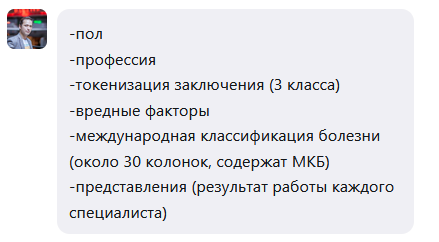
2. Сходу надо выпилить все строки, где есть пропуски по обязательным столбцам
3. Во-вторых, в таблице овермного пустых столбцов. Столбцы с NaN = 1.00 выкинуть сразу же, чтобы потом даже не думать о них
4. В-третьих, есть строки со смещением. В процессе ручной обработки они определялись по смещению в области МКБ - есть смысл уничтожить их тем же образом.
5. База данных М/Ж => разбить на две части, обработать.
  * Порог мужской заполненности: .245
  * Порог женской заполненности: .235

Исходя из заданных положений алгоритм видится следующим:

### DataGlobalClear.ipynb
1. Определить названия (*) столбцов в required = [ ... ]
2. Считать огромную таблицу
3. Удалить все **row WHERE data[required] = NaN**
4. Удалить все **col WHERE data[col].isna().sum() == height**
5. Удалить все **col WHERE dtype[col] == (DateTime || Guid) <except: BIRTH>**
6. Удалить все дубликаты **col WHERE col + 'Представление' == col + 1**
7. Удалить все **row WHERE data['МКБ10'] !~ ['X0.0']**
8. Разбить на две таблицы м/ж и сохранить их 

### DataSexClear.ipynb
1. Считать субтаблицу
2. (мб) Допроверка: задача на оптимизацию по соотношению заполненности. Текущие значения:
  * Порог **мужской** заполненности: .245
  * Порог **женской** заполненности: .235
3. Подчистить таблицу на предмет слишком пустых столбцов. Опять, мб есть смысл отдавать предпочтение строкам с заполненными required* столбцами
4. Дропнуть ненужные данные
5. Сохранить финальные подчищенные таблицы
6. Сохранить совмещённую таблицу. Подумать над способами слияния

### DataToken.ipynb


## Токенизация

### DataToken.ipynb
1. Механизм токеназии прописан - осталось дофиксить его (как минимум возраст: 16~80 /-16.80).
2. Попробовать два способа токенизации:
  * Градиентное отклонение
  * Дискретные вариации
3. Токенизировать обе БД:
  * Разделённую под 2 нейросети
  * Слитую под одну большую

# Результаты работы

## Условия Эксплуатации

1. Допустимый возраст: от 16 до 100 лет
  - Т.к. возраст токенихируется по (x - 16) / 100

2. Профессии строго ограничены...

## Отчёт

Все исходники и процесс работы: [Drive](https://drive.google.com/drive/folders/12TmS1tPdmDcobT9MqX7_-esouBiHMZay?usp=share_link)

### [DataGlobalClear.ipynb](https://colab.research.google.com/drive/1qKoFxu6-CF-X4Ier7bd1r_O4EZPTQhS1?usp=sharing)

(+) Считать огромную таблицу


(+) Определить названия (*) столбцов в required = [ ... ]

(+) Определить названия (*) столбцов в forbidden = [ ... ]

**Работа с прототипом**

{

(+) Сохранить все required, удалив forbidden

(+) Удалить все **col WHERE data[col].isna().sum() == height**
  - Взято > .99

(+) Удалить все **col WHERE dtype[col] == (DateTime || Guid) <except: BIRTH>**

(+) Удалить все дубликаты **col WHERE col + 'Представление' == col + 1**

}

**Удаление аномалий**

{

(+) Удалить все **row WHERE data['МКБ10'] !~ ['X0.0']**
  - Вместо заданного паттерна исполльзовался массив аномалий (хардкод из прошлых исследований)

(+) Удалить все **row WHERE data[required] = NaN**
  - Без МКБ10 - иначе пустая таблица

}

(+) Разбить на две таблицы м/ж и сохранить их 

### [DataSexClear.ipynb](https://colab.research.google.com/drive/1lGpWVOsJv8JC9hlj_T8KeIxMclcXG8_e?usp=sharing)

(+) Считать субтаблицу

(+) Подчистить таблицу на предмет слишком пустых столбцов. Чистка от гендерных врачей.

(+) Допроверка: задача на оптимизацию по соотношению заполненности. Текущие значения:
  - Через функцию best

(+) Дропнуть ненужные данные

(+) Сохранить финальные подчищенные таблицы

(-) Сохранить совмещённую таблицу. Подумать над способами слияния
  - Слияние невозможно

### [DataToken.ipynb](https://colab.research.google.com/drive/13kiee2ZoYw_qhYAgDs5OGWtFpuA-7_E4?usp=sharing)


(+) Три способа токенизации:
  * Градиентное отклонение
  * Дискретные вариации
  * Смешанное

(+) Дочистка столбцов:
  - 'КлиентПолПредставление'
  - 'Заключение'
  - 'ЗаключениеМК'
  - 'ДиспансернаяГруппа'
  - 'ДиспансернаяГруппаПредставление'
  - 'Диагноз_ЗначениеПредставление'

(+) Парсеры по типам данных

(+) float64 -> x

(+) bool -> 0|1

(+) datetime64[ns] -> now() - x

(+) object
  - Через proc_handler, если есть
  - Через Gradient распределение иначе

(+) Обе БД токенизировать: М/Ж